<a href="https://colab.research.google.com/github/Nadezda-Sut/statistics_in_science/blob/main/adolescents_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


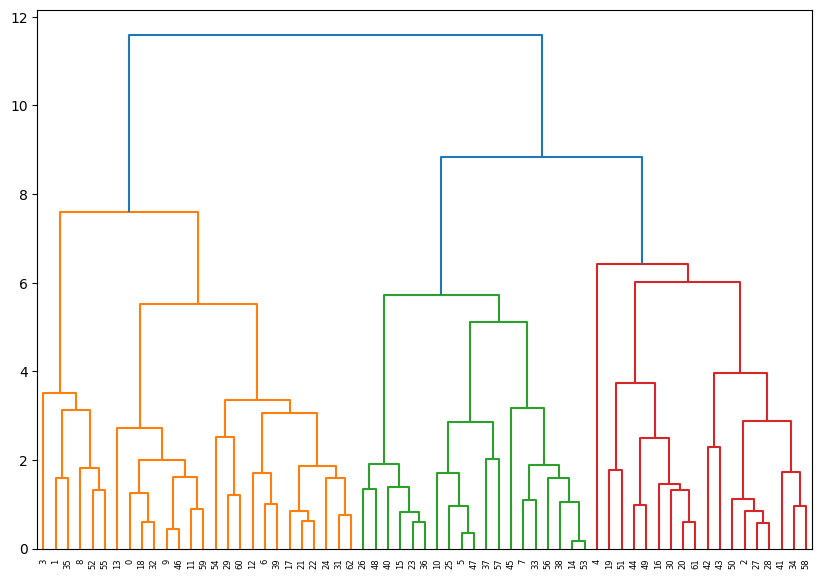

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

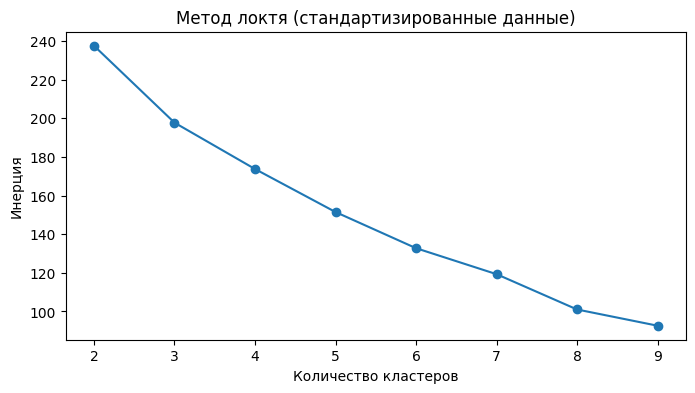

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

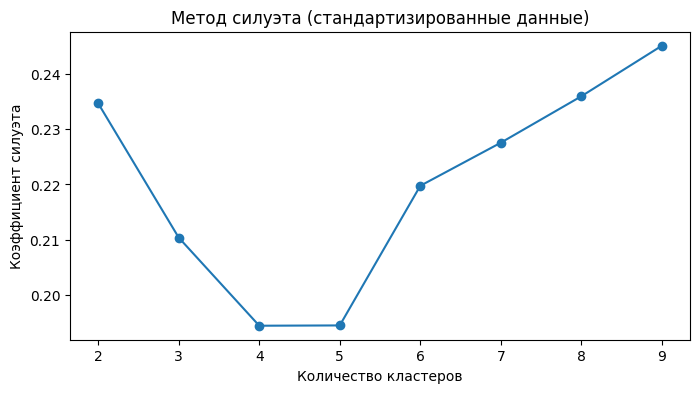

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



Participants in each cluster:
Cluster 0:
['ИЕ' 'МВ' 'КВ' 'ЯВ' 'СкА' 'БК' 'АТ' 'ША' 'МЕ' 'ЧМ' 'ЗП' 'ХА' 'ВВ' 'ПМ'
 'МО' 'ЛА ' 'ПП' 'БК (дислексия скоррект) ' 'Зуб Мар' 'Цыт Але' 'Рож Фед'
 'Вих Мар' 'Пет Але' 'Гри Але' 'Пол Бог' 'Шар Сем']
Cluster 1:
['ЩЗ' 'ИМ' 'ПФ' 'ЗО' 'АЛ' 'УФ' 'ИС' 'КА' 'КС' 'Лип Мар' 'Вой Пет'
 'Гря Анд' 'Гря Ари' 'Кал Вар' 'Фоф Мар' 'Фоф Гли' 'Ели Мар' 'Кры Яро']
Cluster 2:
['ДЛ' 'СА' 'ВА' 'КА' 'КАн' 'КМ' 'ШЕ' 'СИл' 'ТЛ ' 'БС' 'Чел Дан' 'Боб Дар'
 'Пан Соф' 'Цыт Пет' 'Мед Ник' 'Шев Вал' 'Кур Ели' 'Пет Люб' 'Пет Евг']
=== Kruskal-Wallis Test for Each Variable ===

Kruskal-Wallis test results for Time-test: Ош 2 1: KruskalResult(statistic=33.54970809795242, pvalue=5.18529479271273e-08)

Pairwise comparisons (Time-test: Ош 2 1):
Comparison: Cluster 0 vs Cluster 1 - Time-test: Ош 2 1: U = 11.5, p-value = 0.000 (Significant)
Comparison: Cluster 0 vs Cluster 2 - Time-test: Ош 2 1: U = 138.0, p-value = 0.012 (Significant)
Comparison: Cluster 1 vs Cluster 2 - Time-test: О

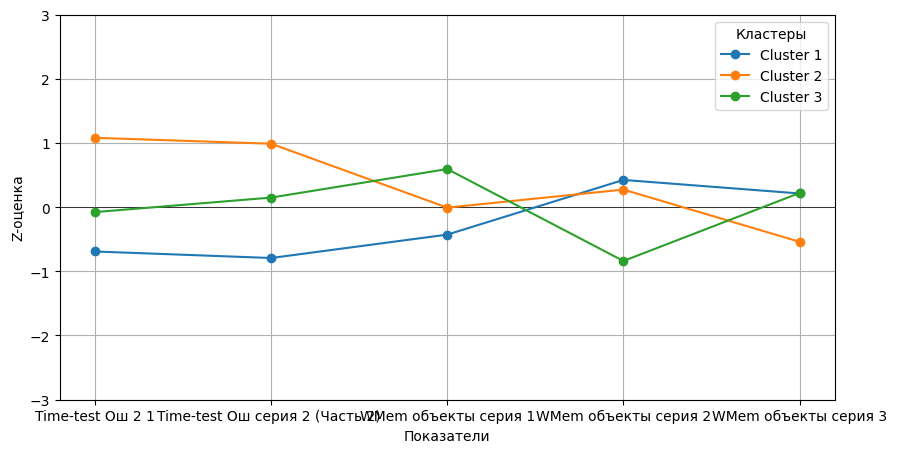

In [10]:
# Подключение к Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from scipy.stats import kruskal, mannwhitneyu
from sklearn.decomposition import PCA

# Загрузка данных
file_path = "/content/gdrive/My Drive/working_memory/adolescents_cluster_websearch.csv"
data = pd.read_csv(file_path)

# Извлечение данных для анализа
variables = ['Time-test: Ош 2 1',
             'Time-test: Количество ошибок, серия 2 (Часть 2) ',
             'WMem: Количество объектов, серия 1',
             'WMem: Количество объектов, серия 2',
             'WMem: Количество объектов, серия 3']

X = data[variables].values

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Построение дендрограммы
plt.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))
plt.show()

# Определение оптимального количества кластеров методом локтя
inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), inertia, marker='o')
plt.title("Метод локтя (стандартизированные данные)")
plt.xlabel("Количество кластеров")
plt.ylabel("Инерция")
plt.show()

# Определение оптимального количества кластеров методом силуэта
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title("Метод силуэта (стандартизированные данные)")
plt.xlabel("Количество кластеров")
plt.ylabel("Коэффициент силуэта")
plt.show()

# Оптимальное количество кластеров (например, 3)
optimal_clusters = 3

# Иерархическая кластеризация
agglo = AgglomerativeClustering(n_clusters=optimal_clusters, affinity='euclidean', linkage='ward')
clusters = agglo.fit_predict(X_scaled)



# Добавление кластеров в данные
data['Cluster'] = clusters

# Вывод номеров участников в каждом кластере
print("Participants in each cluster:")
for i in range(optimal_clusters):
    print(f"Cluster {i}:")
    print(data.loc[data['Cluster'] == i].iloc[:, 0].values)  # Предполагается, что ID участников в первом столбце

# Выполнение Kruskal-Wallis теста и парных сравнений
print("=== Kruskal-Wallis Test for Each Variable ===")
for column in variables:
    data_groups = [data[data['Cluster'] == i][column] for i in range(optimal_clusters)]
    kruskal_results = kruskal(*data_groups)
    print(f"\nKruskal-Wallis test results for {column}: {kruskal_results}")

    # Выполнение парных сравнений, если Kruskal-Wallis показывает значимость
    if kruskal_results.pvalue < 0.05:
        p_values = []
        clusters_unique = data['Cluster'].unique()
        for i in range(len(clusters_unique)):
            for j in range(i + 1, len(clusters_unique)):
                u_stat, p_val = mannwhitneyu(
                    data[data['Cluster'] == clusters_unique[i]][column],
                    data[data['Cluster'] == clusters_unique[j]][column]
                )
                p_values.append((f"Comparison: Cluster {clusters_unique[i]} vs Cluster {clusters_unique[j]} - {column}", u_stat, p_val))

        # Печать результатов парных сравнений
        print(f"\nPairwise comparisons ({column}):")
        for comparison, u_stat, p_value in p_values:
            significance = "Significant" if p_value < 0.05 else "Not Significant"
            print(f"{comparison}: U = {u_stat:.1f}, p-value = {p_value:.3f} ({significance})")

# Функция для визуализации Z-Score данных с диапазоном от -3 до 3
def plot_standardized_scores(profiles, measures):
    plt.figure(figsize=(10, 5))

    for profile_name, profile_data in profiles.items():
        mean_scores = np.mean(profile_data, axis=0)
        plt.errorbar(measures, mean_scores, label=profile_name, fmt='o-', capsize=5)

    plt.axhline(0, color='black', linewidth=0.5)
    plt.ylim(-3, 3)  # Ограничение диапазона оси Y от -3 до 3
    plt.xlabel('Показатели')
    plt.ylabel('Z-оценка')
    plt.grid(True)
    plt.legend(title='Кластеры')
    plt.show()

# Подготовка данных для построения графиков
measures = ['Time-test Ош 2 1',
            'Time-test Ош серия 2 (Часть 2) ',
            'WMem объекты серия 1',
            'WMem объекты серия 2',
            'WMem объекты серия 3']

# Кластеры
profiles = {}
for i in range(optimal_clusters):
    profiles[f'Cluster {i+1}'] = X_scaled[clusters == i]

# Построение графиков Z-Score
plot_standardized_scores(profiles, measures)


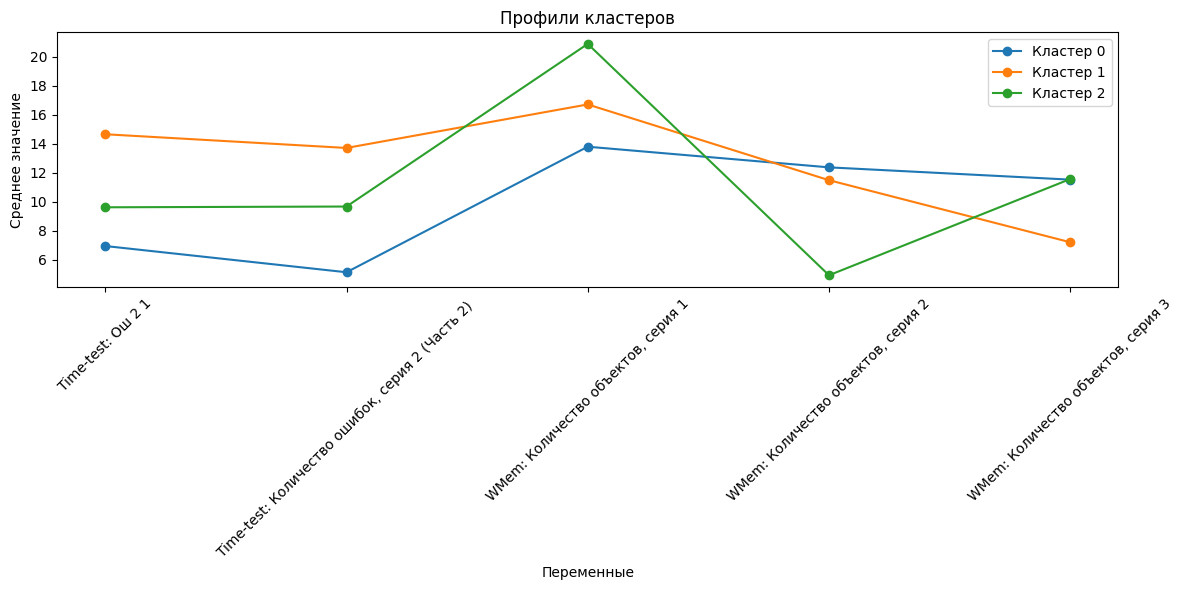

In [11]:
def plot_cluster_profiles(data, variables):
    clusters = data['Cluster'].unique()
    plt.figure(figsize=(12, 6))

    for cluster in clusters:
        cluster_data = data[data['Cluster'] == cluster]
        mean_scores = cluster_data[variables].mean()
        plt.plot(variables, mean_scores, marker='o', label=f'Кластер {cluster}')

    plt.title('Профили кластеров')
    plt.xlabel('Переменные')
    plt.ylabel('Среднее значение')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_cluster_profiles(data, variables)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

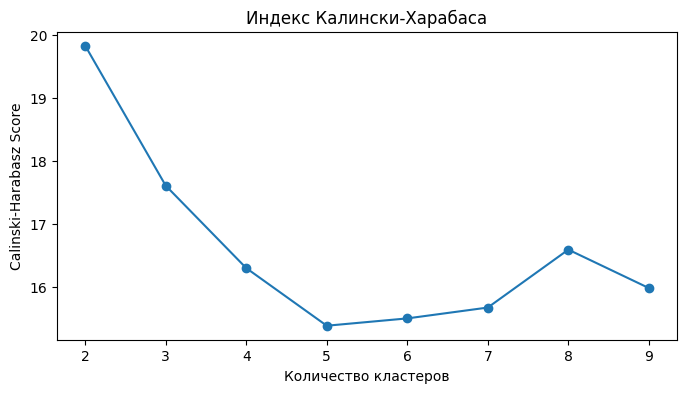

Оптимальное количество кластеров по индексу Калински-Харабаса: 2


In [12]:
from sklearn.metrics import calinski_harabasz_score

ch_scores = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = calinski_harabasz_score(X_scaled, labels)
    ch_scores.append(score)

# Построение графика
plt.figure(figsize=(8, 4))
plt.plot(K, ch_scores, marker='o')
plt.title("Индекс Калински-Харабаса")
plt.xlabel("Количество кластеров")
plt.ylabel("Calinski-Harabasz Score")
plt.show()

# Определение оптимального количества кластеров
optimal_k_ch = K[np.argmax(ch_scores)]
print(f"Оптимальное количество кластеров по индексу Калински-Харабаса: {optimal_k_ch}")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


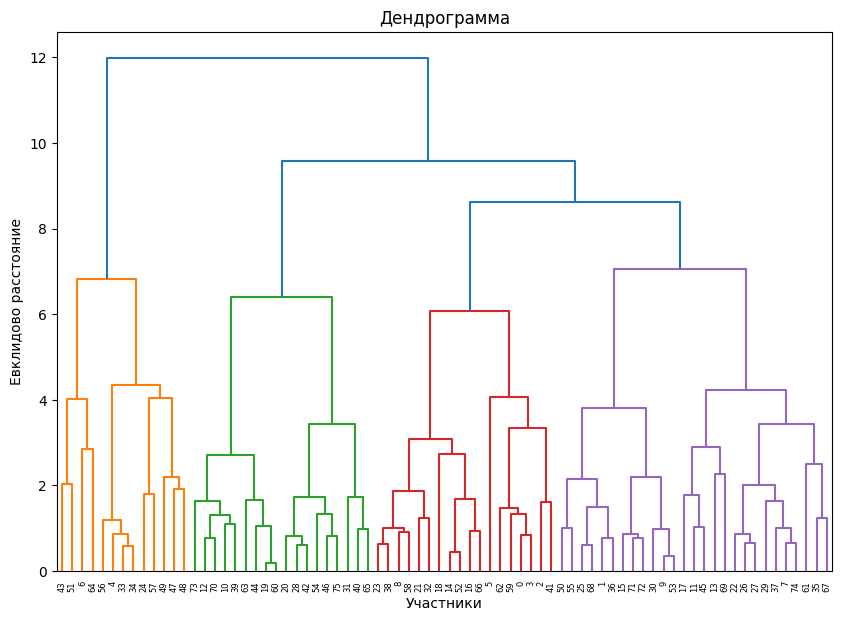

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

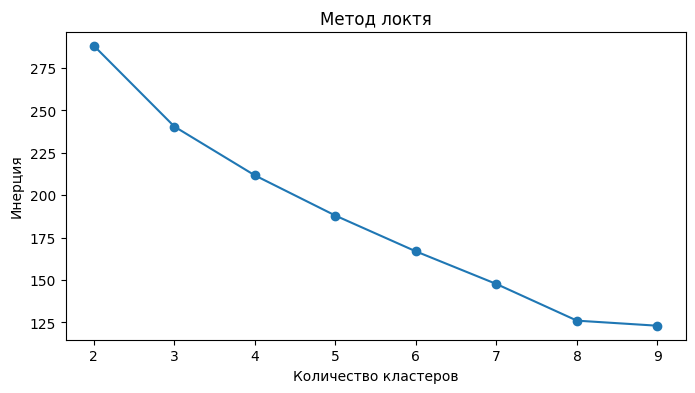

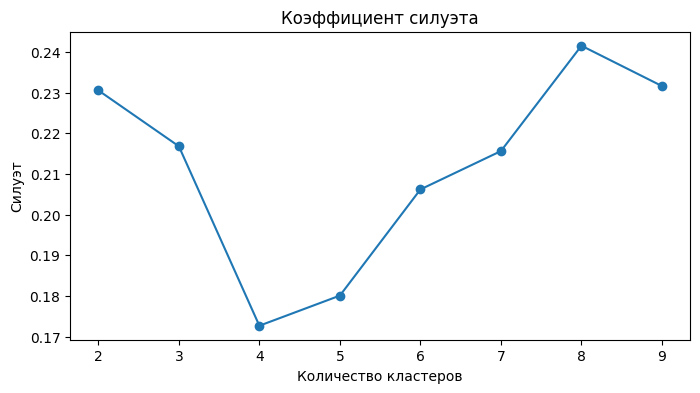

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



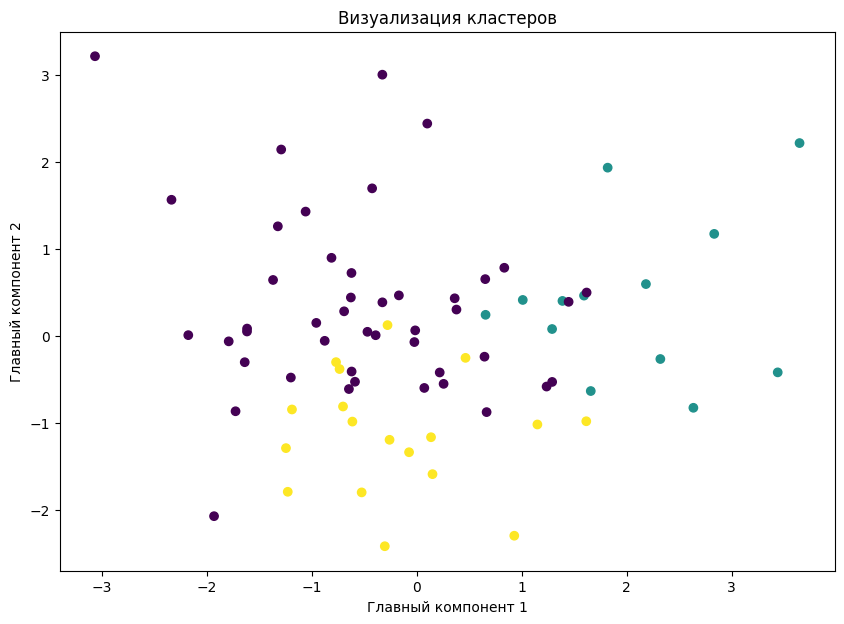

Профили кластеров:
         Time-test: Ош 2 1  Time-test: Количество ошибок, серия 2 (Часть 2)   \
Cluster                                                                        
0                 8.533333                                          6.844444   
1                16.000000                                         15.461538   
2                 8.000000                                          8.777778   

         WMem: Количество объектов, серия 1  \
Cluster                                       
0                                 13.311111   
1                                 18.230769   
2                                 24.500000   

         WMem: Количество объектов, серия 2  \
Cluster                                       
0                                 10.755556   
1                                 10.846154   
2                                  5.666667   

         WMem: Количество объектов, серия 3  
Cluster                                      
0               

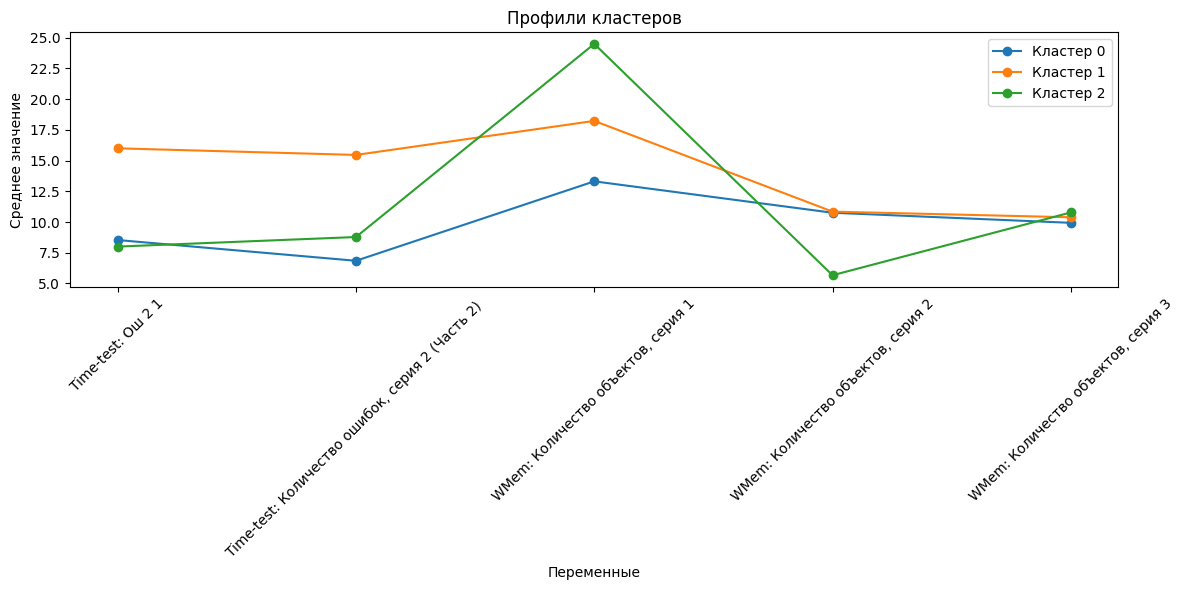

Результаты теста Крускала-Уоллиса:
Time-test: Ош 2 1: H = 28.692, p-value = 0.000

Парные сравнения для переменной Time-test: Ош 2 1:


ValueError: `x` and `y` must be of nonzero size.

In [8]:
# Подключение к Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.stats import kruskal, mannwhitneyu

# Шаг 1: Загрузка данных
file_path = "/content/gdrive/My Drive/working_memory/adolescents_cluster.csv"
data = pd.read_csv(file_path)

# Шаг 2: Выбор переменных
variables = [
    'Time-test: Ош 2 1',
    'Time-test: Количество ошибок, серия 2 (Часть 2) ',
    'WMem: Количество объектов, серия 1',
    'WMem: Количество объектов, серия 2',
    'WMem: Количество объектов, серия 3'
]

X = data[variables].values

# Шаг 3: Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Шаг 4: Построение дендрограммы
plt.figure(figsize=(10, 7))
plt.title("Дендрограмма")
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))
plt.xlabel("Участники")
plt.ylabel("Евклидово расстояние")
plt.show()

# Шаг 5: Определение оптимального количества кластеров
inertia = []
silhouette_scores = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Метод локтя
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.title("Метод локтя")
plt.xlabel("Количество кластеров")
plt.ylabel("Инерция")
plt.show()

# Коэффициент силуэта
plt.figure(figsize=(8, 4))
plt.plot(K, silhouette_scores, marker='o')
plt.title("Коэффициент силуэта")
plt.xlabel("Количество кластеров")
plt.ylabel("Силуэт")
plt.show()

# Шаг 6: Кластеризация
optimal_clusters = 3  # Замените на выбранное количество
clustering = AgglomerativeClustering(n_clusters=optimal_clusters, affinity='euclidean', linkage='ward')
cluster_labels = clustering.fit_predict(X_scaled)
data['Cluster'] = cluster_labels

# Шаг 7: Визуализация кластеров
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title("Визуализация кластеров")
plt.xlabel("Главный компонент 1")
plt.ylabel("Главный компонент 2")
plt.show()

# Шаг 8: Анализ профилей кластеров
cluster_profiles = data.groupby('Cluster')[variables].mean()
print("Профили кластеров:")
print(cluster_profiles)

def plot_cluster_profiles(data, variables):
    clusters = data['Cluster'].unique()
    plt.figure(figsize=(12, 6))

    for cluster in clusters:
        cluster_data = data[data['Cluster'] == cluster]
        mean_scores = cluster_data[variables].mean()
        plt.plot(variables, mean_scores, marker='o', label=f'Кластер {cluster}')

    plt.title('Профили кластеров')
    plt.xlabel('Переменные')
    plt.ylabel('Среднее значение')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_cluster_profiles(data, variables)

# Шаг 9: Статистический анализ
print("Результаты теста Крускала-Уоллиса:")
for variable in variables:
    groups = [data[data['Cluster'] == cluster][variable] for cluster in data['Cluster'].unique()]
    stat, p = kruskal(*groups)
    print(f"{variable}: H = {stat:.3f}, p-value = {p:.3f}")

    if p < 0.05:
        print(f"\nПарные сравнения для переменной {variable}:")
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                group1 = data[data['Cluster'] == clusters[i]][variable]
                group2 = data[data['Cluster'] == clusters[j]][variable]
                u_stat, u_p = mannwhitneyu(group1, group2)
                print(f"Кластер {clusters[i]} vs Кластер {clusters[j]}: U = {u_stat}, p-value = {u_p:.3f}")
